In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [8]:
import json

text_file_path = 'caselaw_data_illinois/text.data.jsonl.xz'

df_text = pd.read_json(text_file_path, lines=True, compression='xz')

# Display basic information about the dataset
print("Text Dataset Information:")
df_text.info()

Text Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183149 entries, 0 to 183148
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 183149 non-null  int64 
 1   name               183149 non-null  object
 2   name_abbreviation  183149 non-null  object
 3   decision_date      183149 non-null  object
 4   docket_number      183149 non-null  object
 5   first_page         183149 non-null  object
 6   last_page          183149 non-null  object
 7   citations          183149 non-null  object
 8   volume             183149 non-null  object
 9   reporter           183149 non-null  object
 10  court              183149 non-null  object
 11  jurisdiction       183149 non-null  object
 12  casebody           183149 non-null  object
dtypes: int64(1), object(12)
memory usage: 18.2+ MB


In [9]:
print("\nFirst Few Rows of the Dataset:")
df_text.head()


First Few Rows of the Dataset:


,id,name,name_abbreviation,decision_date,docket_number,first_page,last_page,citations,volume,reporter,court,jurisdiction,casebody
0,2747110,"The People of the State of Illinois, Plaintiff...",People v. Tobin,1771-10-12,No. 70-17,538,543,"[{'type': 'official', 'cite': '2 Ill. App. 3d ...",{'volume_number': '2'},{'full_name': 'Illinois Appellate Court Report...,"{'id': 8837, 'name': 'Illinois Appellate Court...","{'id': 29, 'slug': 'ill', 'name': 'Ill.', 'nam...","{'status': 'ok', 'data': {'opinions': [{'type'..."
1,435537,"James A. Whitesides and others, Plaintiffs in ...",Whitesides v. People,1819-12,,21,22,"[{'type': 'official', 'cite': '1 Ill. 21'}]",{'volume_number': '1'},{'full_name': 'Illinois Reports'},"{'id': 8853, 'name': 'Illinois Supreme Court',...","{'id': 29, 'slug': 'ill', 'name': 'Ill.', 'nam...","{'status': 'ok', 'data': {'opinions': [{'type'..."
2,435638,"Amos Chipps, Appellant, v. Thomas Yancey, Appe...",Chipps v. Yancey,1819-12,,19,19,"[{'type': 'official', 'cite': '1 Ill. 19'}]",{'volume_number': '1'},{'full_name': 'Illinois Reports'},"{'id': 8853, 'name': 'Illinois Supreme Court',...","{'id': 29, 'slug': 'ill', 'name': 'Ill.', 'nam...","{'status': 'ok', 'data': {'opinions': [{'type'..."
3,435690,"Jonathan Taylor, Appellant, v. Michael Sprinkl...",Taylor v. Sprinkle,1819-12,,17,18,"[{'type': 'official', 'cite': '1 Ill. 17'}]",{'volume_number': '1'},{'full_name': 'Illinois Reports'},"{'id': 8853, 'name': 'Illinois Supreme Court',...","{'id': 29, 'slug': 'ill', 'name': 'Ill.', 'nam...","{'status': 'ok', 'data': {'opinions': [{'type'..."
4,435710,"François Coleen and Abraham Claypole, Appellan...",Coleen v. Figgins,1819-12,,19,20,"[{'type': 'official', 'cite': '1 Ill. 19'}]",{'volume_number': '1'},{'full_name': 'Illinois Reports'},"{'id': 8853, 'name': 'Illinois Supreme Court',...","{'id': 29, 'slug': 'ill', 'name': 'Ill.', 'nam...","{'status': 'ok', 'data': {'opinions': [{'type'..."


In [10]:
def extract_casebody(data):
    casebody = data['data']
    return casebody

df_text['casebody_extracted'] = df_text['casebody'].apply(extract_casebody)

In [11]:
print("\nFirst Few Extracted Casebodies:")
df_text['casebody_extracted'].head()


First Few Extracted Casebodies:


0    {'opinions': [{'type': 'majority', 'text': 'Mr...
1    {'opinions': [{'type': 'majority', 'text': 'Op...
2    {'opinions': [{'type': 'majority', 'text': 'Op...
3    {'opinions': [{'type': 'majority', 'text': 'Op...
4    {'opinions': [{'type': 'majority', 'text': 'Op...
Name: casebody_extracted, dtype: object

In [12]:
print("\nStructure of a Single Extracted Casebody:")
print(json.dumps(df_text['casebody_extracted'].iloc[0], indent=4))


Structure of a Single Extracted Casebody:
{
    "opinions": [
        {
            "type": "majority",
            "text": "Mr. PRESIDING JUSTICE EBERSPACHER\ndelivered the opinion of the court:\nDefendant Tobin was convicted by a jury of the crime of burglary. The court entered judgment upon the verdict and sentenced the defendant to a fifteen to twenty-five year term in the Illinois State Penitentiary. The judgment of the court further provided that the mittimus was to be effective upon release by federal authorities.\nThe defendant has appealed from that judgment and raised the following issues: (1) The State failed to prove lack of authority to enter the premises; (2) The State failed to prove intent to commit a theft; (3) The court erred in allowing testimony concerning the arrest of Sherri Tobin, her possession of a firearm and evidence concerning defendant\u2019s possession of a firearm; (4) The sentence was excessive.\nThe facts giving rise to this case are as follows: On the

In [13]:
def extract_opinions(casebody):
    opinions = casebody.get('opinions', [])
    majority_opinion = next((opinion['text'] for opinion in opinions if opinion['type'] == 'majority'), None)
    return majority_opinion

df_text['majority_opinion'] = df_text['casebody_extracted'].apply(extract_opinions)

In [14]:
print("\nFirst Few Rows with Extracted Majority Opinions:")
print(df_text[['id', 'name', 'majority_opinion']].head())


First Few Rows with Extracted Majority Opinions:
        id                                               name  \
0  2747110  The People of the State of Illinois, Plaintiff...   
1   435537  James A. Whitesides and others, Plaintiffs in ...   
2   435638  Amos Chipps, Appellant, v. Thomas Yancey, Appe...   
3   435690  Jonathan Taylor, Appellant, v. Michael Sprinkl...   
4   435710  François Coleen and Abraham Claypole, Appellan...   

                                    majority_opinion  
0  Mr. PRESIDING JUSTICE EBERSPACHER\ndelivered t...  
1  Opinion of the Court. This was a criminal pros...  
2  Opinion of the Court.\n*\nThis was an action o...  
3  Opinion of the Court.\n*\nThis was an action o...  
4  Opinion of the Court.\n†\nIt appears from the ...  


In [16]:
df_cleaned = df_text.dropna(subset=['majority_opinion'])

In [18]:
print("\nNumber of Rows Before Dropping Rows with Missing Majority Opinions:", len(df_text))
print("\nNumber of Rows After Dropping Rows with Missing Majority Opinions:", len(df_cleaned))
print(f"\nDifference : {len(df_text) - len(df_cleaned)}")


Number of Rows Before Dropping Rows with Missing Majority Opinions: 183149

Number of Rows After Dropping Rows with Missing Majority Opinions: 182886

Difference : 263


## Exploratory Data Analysis

### 1. Distribution of the length of opinions

In [33]:
# Initial Analysis: Distribution of the length of the majority opinions
df_cleaned.loc[:, 'opinion_length'] = df_cleaned['majority_opinion'].apply(len)

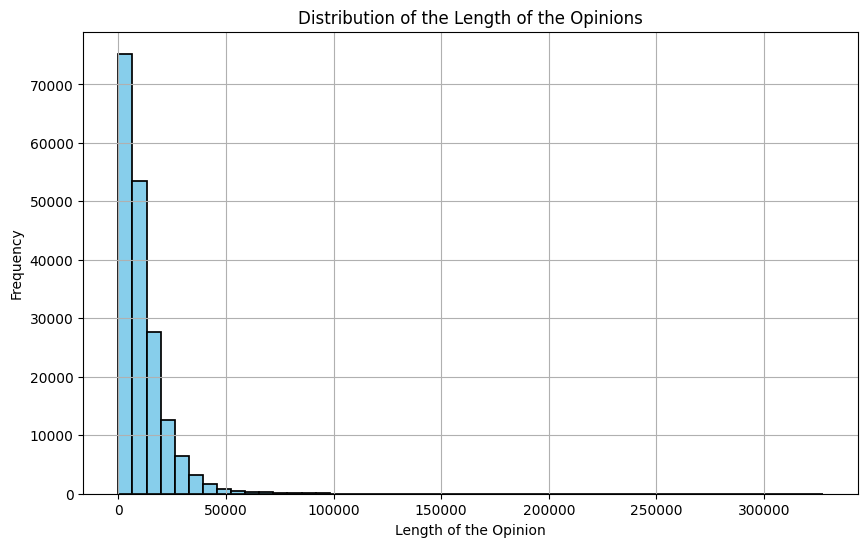

In [40]:
plt.figure(figsize=(10,6))
df_cleaned['opinion_length'].hist(bins=50, color='skyblue', edgecolor='black', linewidth=1.25)
plt.title("Distribution of the Length of the Opinions")
plt.xlabel("Length of the Opinion")
plt.ylabel("Frequency")
plt.show()

In [ ]:
opinion_length_stats = df_cleaned['opinion_length'].describe()
print(opinion_length_stats)

count    182886.000000
mean      10694.028827
std       11075.533578
min           7.000000
25%        3357.000000
50%        8230.000000
75%       14614.000000
max      327348.000000
Name: opinion_length, dtype: float64


It can be visually observed and programmatically confirmed that most tof the opinions are around 10.5K characters long, where as maximum opinion's character count is 300k + and minimum character count is just 7.

### 2. Distribution of Opinion Lengths by Court
This box plot will help us understand the variation in opinion lengths across different courts.
We can identify which courts tend to have longer or shorter opinions and observe any outliers.

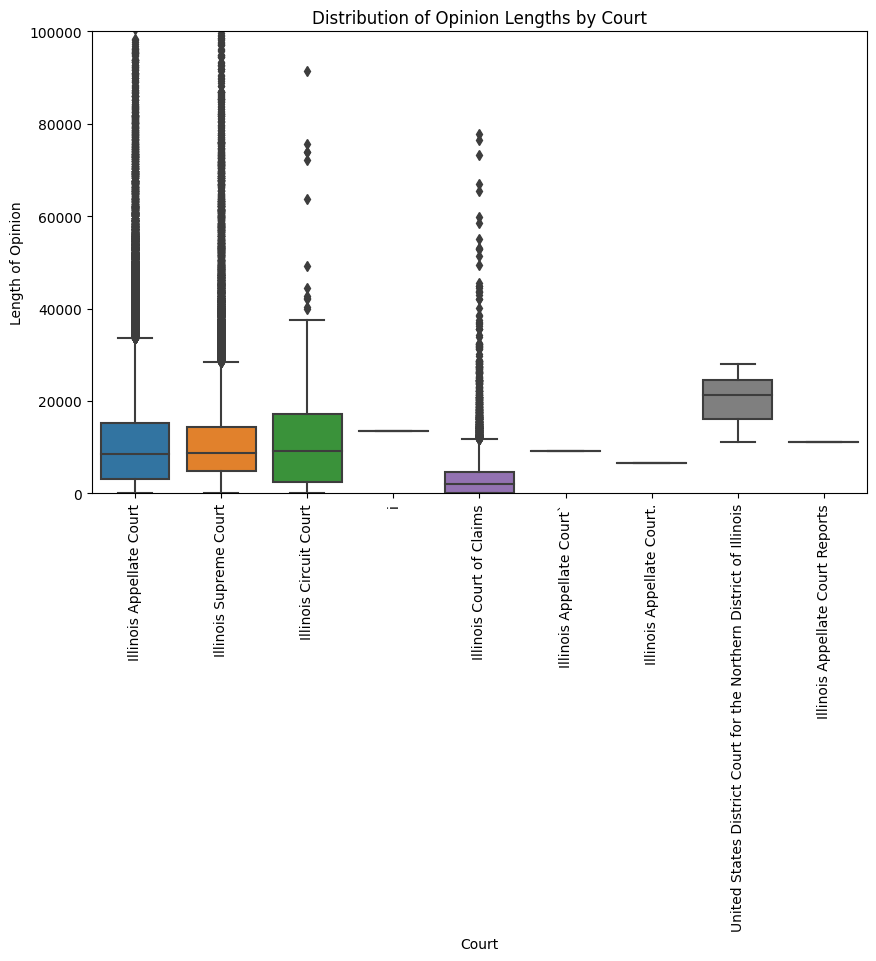

In [41]:
df_cleaned.loc[:, 'court_name'] = df_cleaned['court'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

plt.figure(figsize=(10,6))

sns.boxplot(x='court_name', y='opinion_length', data=df_cleaned)
plt.title("Distribution of Opinion Lengths by Court")
plt.xlabel("Court")
plt.ylabel("Length of Opinion")
plt.xticks(rotation=90)
plt.ylim(0, 100000)
plt.show()

In [71]:
min_opinion = df_cleaned[df_cleaned['opinion_length'] == df_cleaned['opinion_length'].min()]['majority_opinion'].iloc[0]
print(f"\n Opinion with the min length: {len(min_opinion)}\n\n {min_opinion}")


 Opinion with the min length: 7

 Dove J.


In [70]:
max_opinion = df_cleaned[df_cleaned['opinion_length'] == df_cleaned['opinion_length'].max()]['majority_opinion'].iloc[0]
print(f"\n Opinion with the max length: {len(max_opinion)}\n\b {max_opinion}")


 Opinion with the max length: 327348
 Mr. Justice Magruder
delivered the opinion of the Court: This case comes before us by writ of error to the Criminal Court of Cook county. The writ has been made a supersedeas.
Plaintiffs in error were tried in the summer of 1886 for the murder of Matthias J. Began, on May 4, 1886, in -the city of 'Chicago, Cook county, Illinois. On August 20, 1886, the jury returned a verdict finding the defendants August Spies, ¡Michael Schwab, Samuel Bielden, Albert E. Parsons, Adolph ¡Fischer, George Engel and Louis- Lingg guilty of murder, and fixing' death as the penalty. By the same verdict they also found Oscar W. ¡Neebe guilty of murder and fixed the penalty at imprisonment in the penitentiary for fifteen years.
About the 1st day of May, 1886, the workingmen of Chicago and of other industrial centers in the United States were greatly excited upon the subject of inducing their employers to reduce the time, during which they should be required to labor on e

### 3. Trend of Opinion Lengths Over Time

This line plot will show the average opinion length over the years,
helping us identify trends in how detailed judicial opinions have become over time.
It can indicate whether opinions are becoming longer or more concise.

/var/tmp/ipykernel_15478/2012387144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = df_cleaned['decision_date'].str[:4].astype(int)


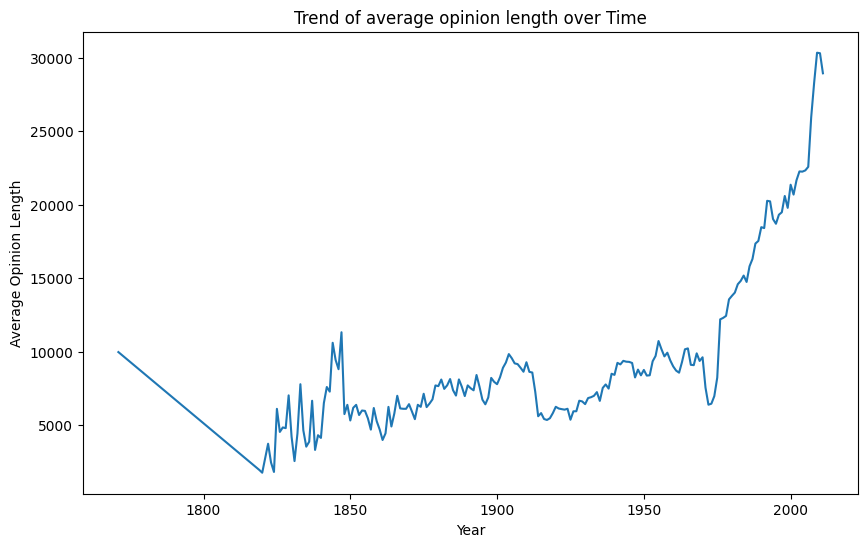

In [44]:
df_cleaned['year'] = df_cleaned['decision_date'].str[:4].astype(int)
avg_opinion_length_by_year = df_cleaned.groupby('year')['opinion_length'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='opinion_length', data=avg_opinion_length_by_year)
plt.title('Trend of average opinion length over Time')
plt.xlabel('Year')
plt.ylabel('Average Opinion Length')
plt.show()

It can be deduced from the data that as the time progressed, democracy and rule of law prevailed, the avg length of opinions increased over time, especially around 1960-1970s during the Civil Rights Moment, when people of color were given human rights. Looking at the graph we can see a significant increase in opinions from the judges after that era, as the constitution provided fundamental rights, and right to freedom of expression
